# Diabetes Prediction - ML-Model

#### Load preprocessed data, Build, Select, Train and Evaluate Models

In [1]:
from models_config import *
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

print("Libraries Imported ..")

Libraries Imported ..


## 1. Load Preprocessed Dataset

In [2]:
DATA_PATH =  "../data/prepared_data.json"
mfcc, labels = load_data(DATA_PATH)

In [3]:
print(f" MFCCs Shape : {mfcc.shape} | Labels Length : {len(labels)}")

 MFCCs Shape : (8275, 44, 13) | Labels Length : 8275


## 2. Data Preparation

In [4]:
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2, DATA_PATH)
pd.DataFrame({"Training": [X_train.shape, y_train.shape], 
              "Validation":[X_validation.shape, y_validation.shape], 
              "Testing":[X_test.shape, y_test.shape]}, index=['Features', 'Target'])

,Training,Validation,Testing
Features,"(4964, 44, 13, 1)","(1242, 44, 13, 1)","(2069, 44, 13, 1)"
Target,"(4964,)","(1242,)","(2069,)"


## 3. Build Model

In [5]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_ann_model(input_shape)

## 4. Compule Model

In [6]:
lr, loss, metrics = 0.0001, 'sparse_categorical_crossentropy', 'accuracy'
model = compule_model(lr, loss, metrics, model)

## 5.  Model Summary

In [7]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 572)               0         
                                                                 
 dense (Dense)               (None, 512)               293376    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

## 6. Train Model

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Epoch 1/30
156/156 [==============================] - 1s 7ms/step - loss: 35.7297 - accuracy: 0.1017 - val_loss: 3.3452 - val_accuracy: 0.0886
Epoch 2/30
156/156 [==============================] - 1s 5ms/step - loss: 8.1139 - accuracy: 0.1003 - val_loss: 3.2707 - val_accuracy: 0.0950
Epoch 3/30
156/156 [==============================] - 1s 5ms/step - loss: 4.9712 - accuracy: 0.0935 - val_loss: 3.2708 - val_accuracy: 0.0966
Epoch 4/30
156/156 [==============================] - 1s 5ms/step - loss: 4.1753 - accuracy: 0.0957 - val_loss: 3.2692 - val_accuracy: 0.0982
Epoch 5/30
156/156 [==============================] - 1s 4ms/step - loss: 3.8467 - accuracy: 0.1227 - val_loss: 3.2672 - val_accuracy: 0.0982
Epoch 6/30
156/156 [==============================] - 1s 4ms/step - loss: 3.5747 - accuracy: 0.1195 - val_loss: 3.2649 - val_accuracy: 0.0982
Epoch 7/30
156/156 [==============================] - 1s 4ms/step - loss: 3.4884 - accuracy: 0.1215 - val_loss: 3.2625 - val_accuracy: 0.0982
Epoch

## 7. Plot Model Training History

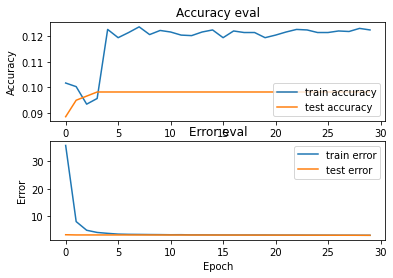

<Figure size 1152x576 with 0 Axes>

In [9]:
plot_history(history)

## 8.  Evaluate Model on test set

In [10]:
model_loss_acc(model, X_train, y_train, X_test, y_test, X_validation, y_validation)

65/65 - 0s - loss: 3.1399 - accuracy: 0.1097 - 103ms/epoch - 2ms/step


,Training,Validation,Testing
Accuracy,12.33,9.82,0.109715
Loss,313.32,313.88,313.990000


## 9. Prediction

In [11]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

# predict sample
predict(model, X_to_predict, y_to_predict)

Target: 8, Predicted label: [4]


#####################################################################################################

#####################################################################################################

#####################################################################################################